In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# used to add some functions such as show and title
%matplotlib inline  
import seaborn as sns
pd.pandas.set_option("display.max_columns",None) # to show all columns

In [3]:
df=pd.read_csv(r"D:\projects\HousePricePrediction\HousePricePrediction\data\train.csv")
print(df.shape) # gives col and rows

(1460, 81)


In [4]:
df.head() # by default give 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
"""Missing value """
#if at least one nanvalue
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

#print all features, with mean till 4 decimal point 
for feature in features_with_na:
    # print 
    print(feature, np.round(df[feature].isnull().mean(),4), '%missing value')

LotFrontage 0.1774 %missing value
Alley 0.9377 %missing value
MasVnrType 0.0055 %missing value
MasVnrArea 0.0055 %missing value
BsmtQual 0.0253 %missing value
BsmtCond 0.0253 %missing value
BsmtExposure 0.026 %missing value
BsmtFinType1 0.0253 %missing value
BsmtFinType2 0.026 %missing value
FireplaceQu 0.4726 %missing value
GarageType 0.0555 %missing value
GarageYrBlt 0.0555 %missing value
GarageFinish 0.0555 %missing value
GarageQual 0.0555 %missing value
GarageCond 0.0555 %missing value
PoolQC 0.9952 %missing value
Fence 0.8075 %missing value
MiscFeature 0.963 %missing value


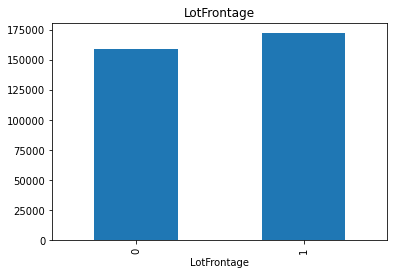

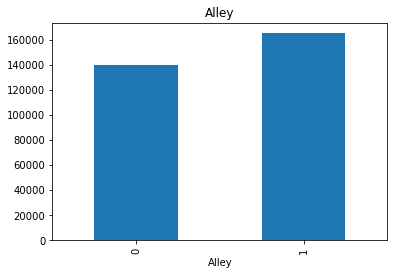

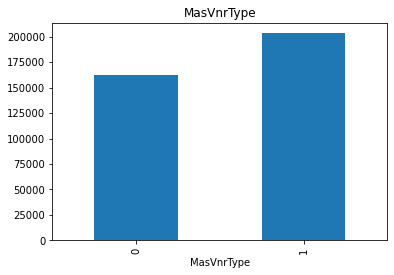

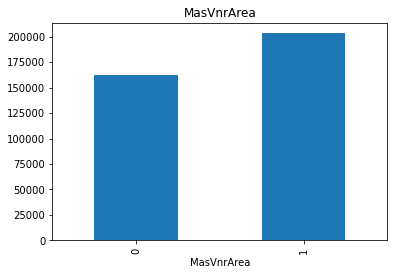

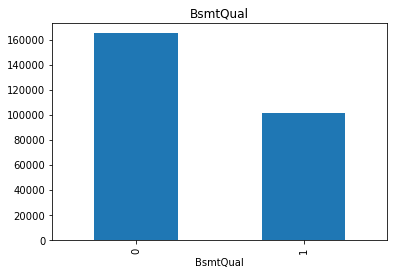

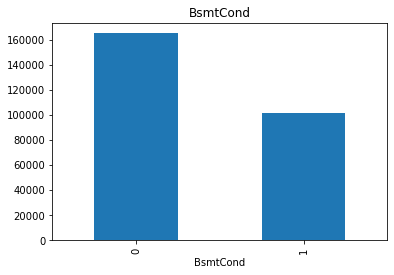

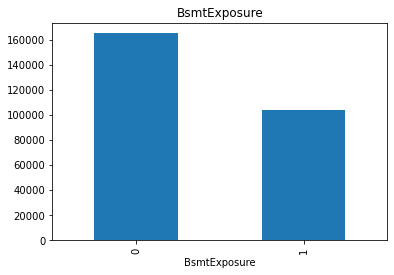

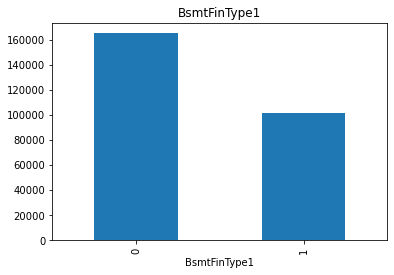

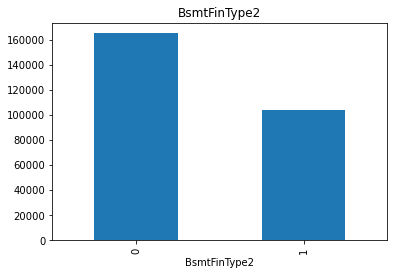

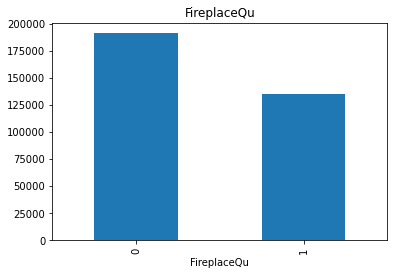

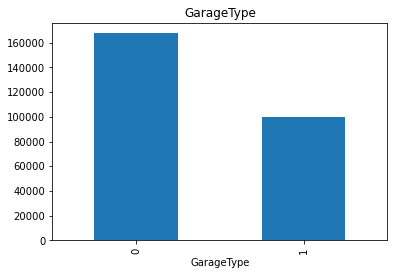

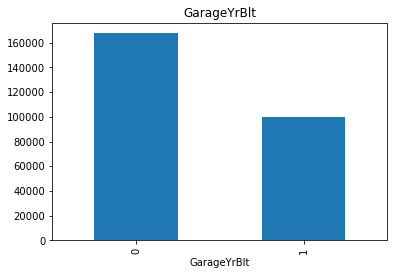

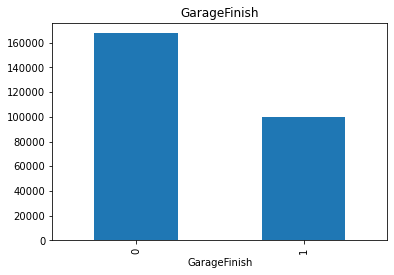

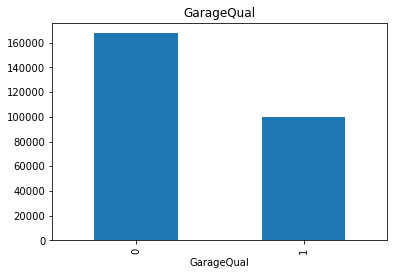

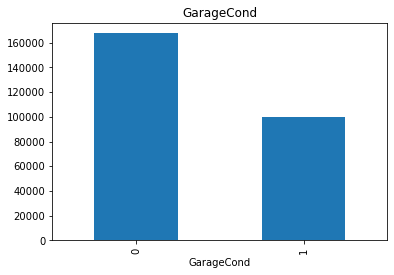

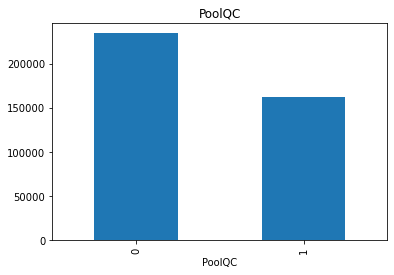

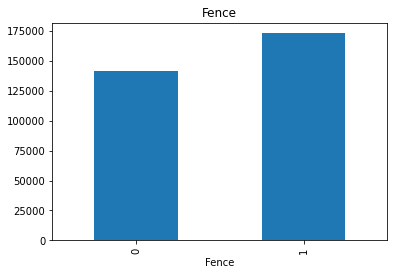

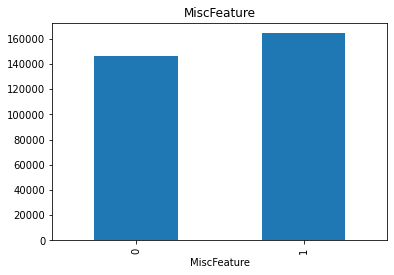

In [6]:
#we can drop missing columns but before dropping understand is there any relation with target column

#copied to another daatset
df2=df.copy()
for feature in features_with_na:
    #convrted missing to 1 else 0
    df2[feature]=np.where(df2[feature].isnull(),1,0)

    df2.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

    
    
    


 we have obsrved that these features are affecting the price so we will do proper treatment 

In [7]:
#understand Id columns and these needs to be dropped
print('distinct id',len(pd.unique(df['Id'])))

distinct id 1460


It is equal to total row

In [8]:
num_cols=[i for i in df.columns if df[i].dtypes !='O'] #O means object , object means string
len(num_cols)

38

In [14]:
# unerstanding temporal variables - date time /year 
temporal_cols=[i for i in num_cols if 'yr' in i.lower() or 'year' in i.lower()]
print(temporal_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [15]:
for i in temporal_cols:
    print(i,df[i].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs year sold')

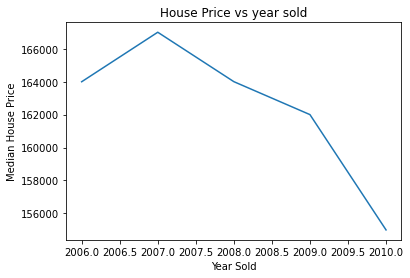

In [17]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs year sold')

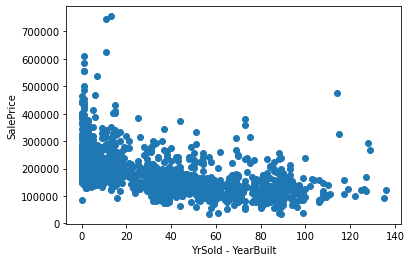

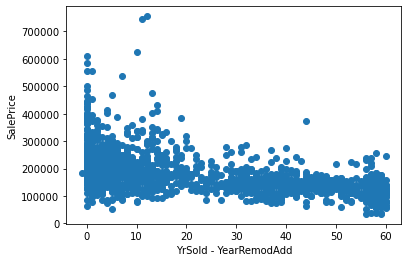

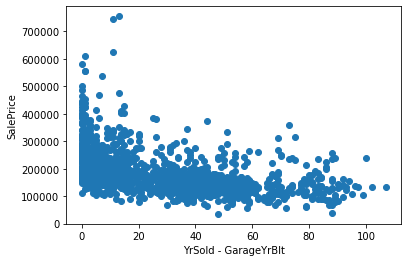

In [19]:
for i in temporal_cols:
    if i !='YrSold':
        df3=df.copy()
        df3[i]=df3['YrSold']-df3[i]

        plt.scatter(df3[i],df3['SalePrice'])
        plt.xlabel(f"YrSold - {i}")
        plt.ylabel('SalePrice')
        plt.show()

In [21]:
#categorize discret feature

discrete_cols= [i for i in num_cols if len(df[i].unique())<25 and i not in temporal_cols+['Id']]
len(discrete_cols)



17

In [22]:
discrete_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

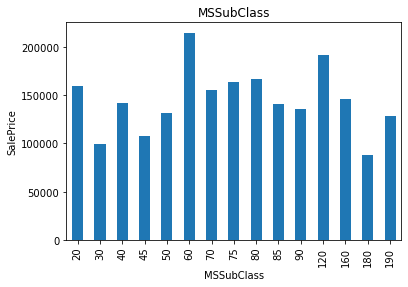

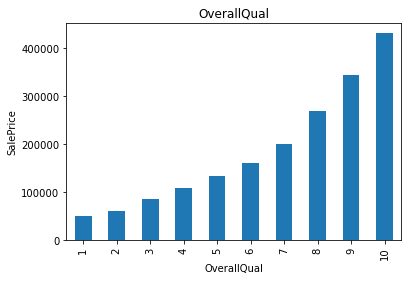

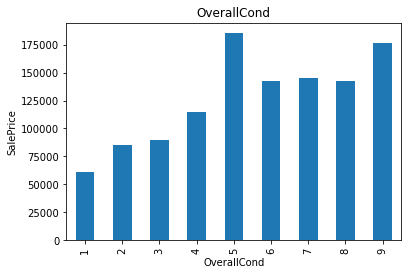

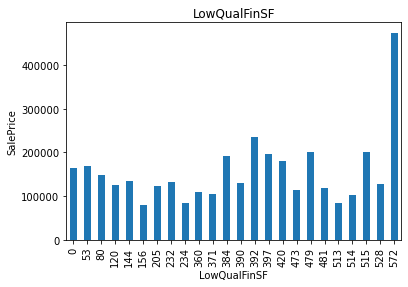

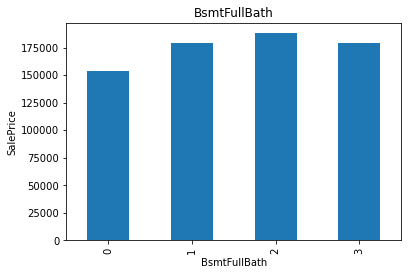

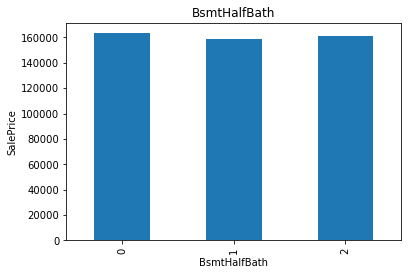

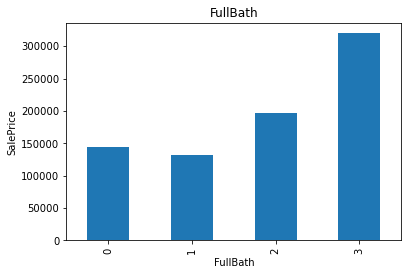

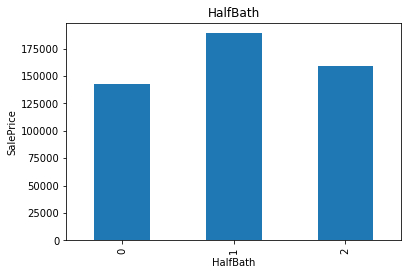

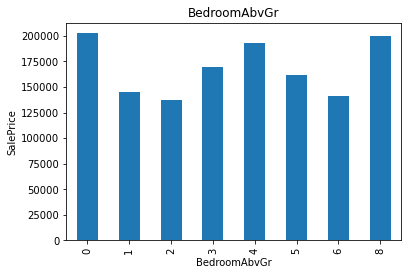

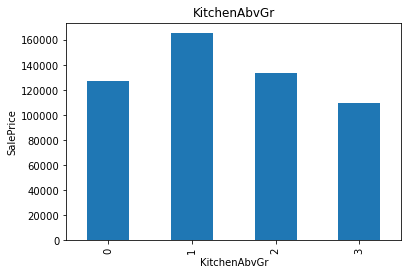

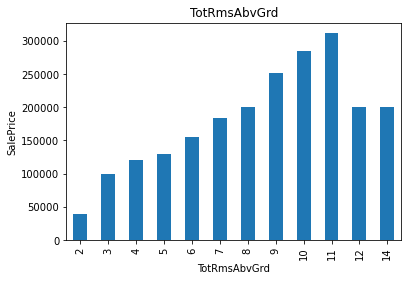

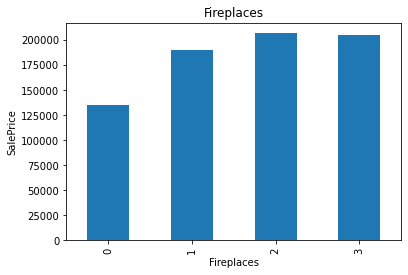

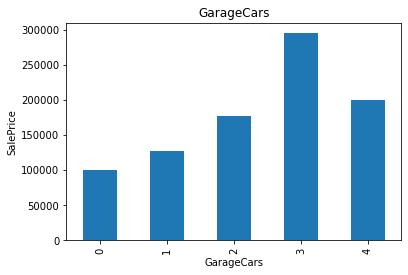

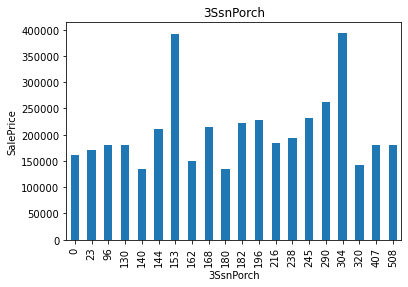

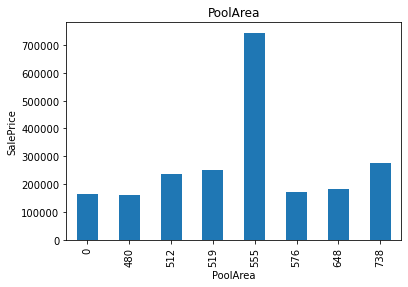

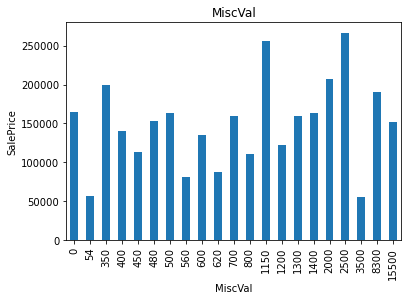

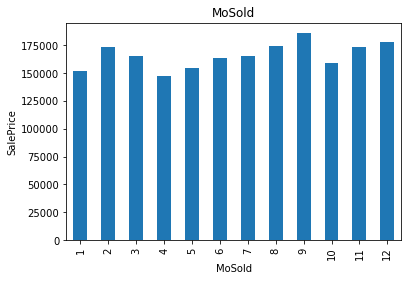

In [24]:
for i in discrete_cols:
    df4=df.copy()
    df4.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

In [25]:
#categorize discret feature

cont_cols= [i for i in num_cols if  i not in temporal_cols+['Id']+discrete_cols]
len(cont_cols)



16

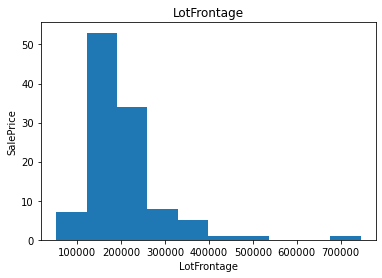

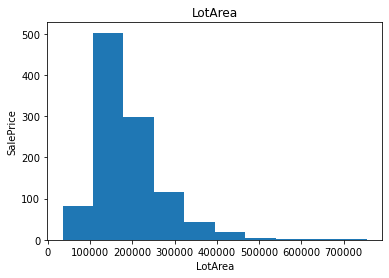

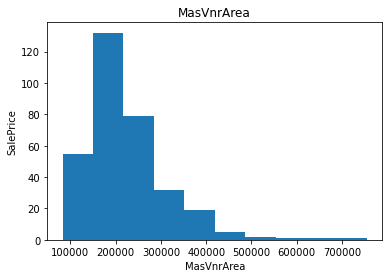

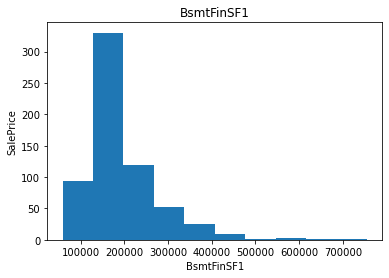

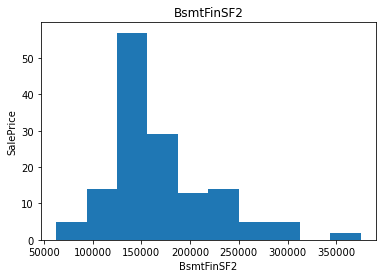

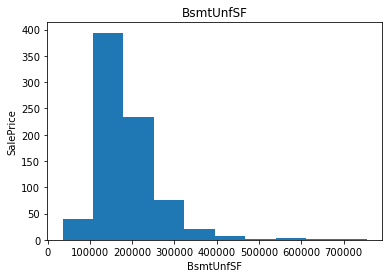

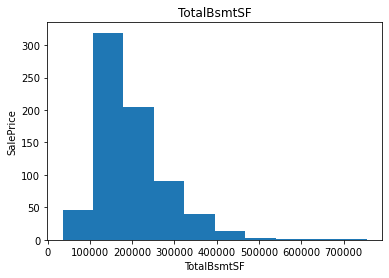

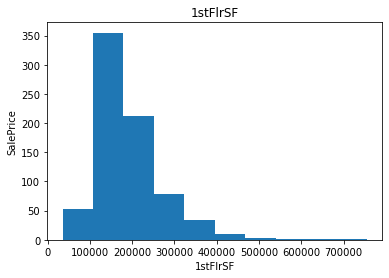

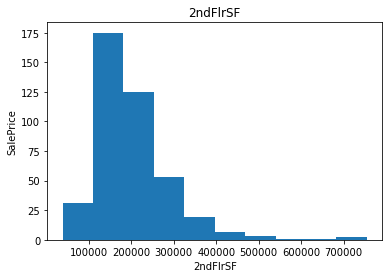

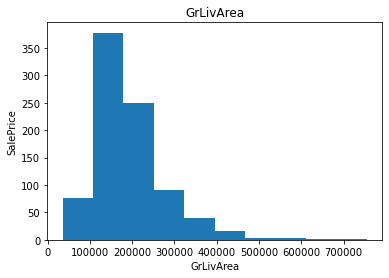

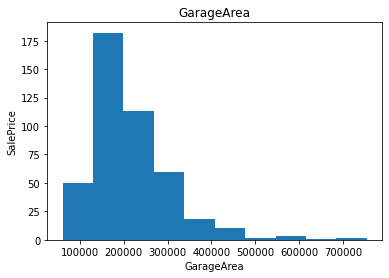

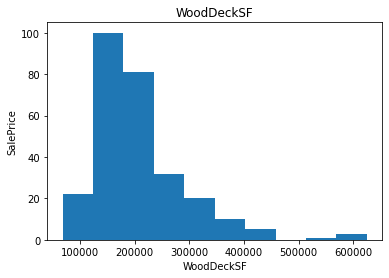

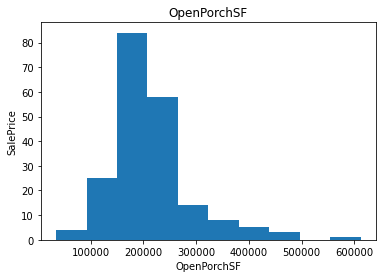

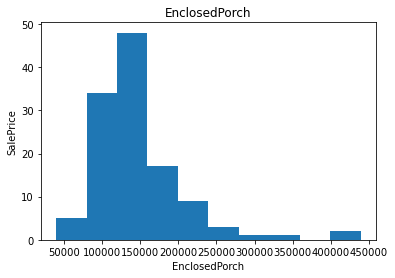

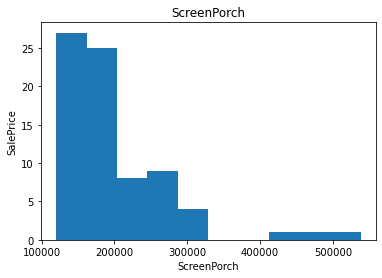

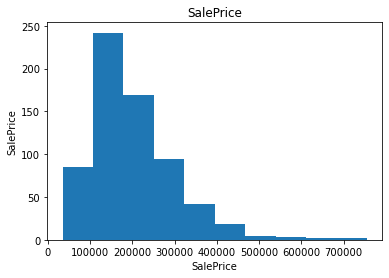

In [26]:
for i in cont_cols:
    df4=df.copy()
    df4.groupby(i)['SalePrice'].median().plot.hist()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()